# The King, the thief and the lucky

You've stolen from the king and been thrown in jail.
The king is magnanimous, however,
and rather than having you drawn and quartered on the spot,
he allows you to play a little game. You're given 100 marbles — 50 black and 50 white
— and you must place them in two urns, in any way you like, as long as you obey the king's rules.
You must place all the marbles, and neither urn can be left empty. Each urn will be shaken
so that the marbles are all jumbled up — the order in which you place them doesn't matter.
The king will then follow a simple procedure: he will pick an urn uniformly at random
(i.e., either one is equally likely to be chosen);
and from that urn, he will draw a marble uniformly at random.
If it's white, you live; but if it's black, you'll be fed to the lions,
or perhaps drawn and quartered — the king hasn't yet made up his mind.
You could place all the white marbles in one urn, and all the black in the other,
in which case your chances are fifty-fifty — but you can do better than that!
If you place the marbles in the best way possible, what is your probability of survival?

Let's use [the law of total probability][1] to define the probability of survival as follows

$$P(S)=P(U_1)P(S|U_1)+P(U_2)P(S|U_2)$$

where $U_1,U_2$ - events of the respective urn being picked by the king and $S$ - the event of survival.

The above translates into

$$P(S) = q\frac{n_w}{n_w + n_b} + (1 - q)\frac{n - n_w}{2n - n_w - n_b},$$

where $q=\frac{1}{2}$ - the probability of the king picking the first urn; $n_w, n_b = 0,\ldots,n$ - number of white and black marbles in the first urn respectively and $n = 100$ - total number of marbles of each colour.

Let's compute the PMF over all possible combinations and try to maximize it.

  [1]: https://en.wikipedia.org/wiki/Law_of_total_probability

In [6]:
%%html
<link rel="stylesheet" href="custom.css"/>

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx


def PMF(nw: int, nb: int, n: int):
    return (nw/(nw + nb) + (n - nw)/(2*n - nw - nb))/2

N = 100
Nw, Nb, P = zip(*[(nw, nb, PMF(nw, nb, N))
                  for nw in range(N + 1)
                  for nb in range(N + 1)
                  if not (nw == 0 and nb == 0 or
                          nw == N and nb == N)])

print('Pmax = {}'.format(max(P)))

Pmax = 0.7487437185929648


So, maximizing for $n_w$ and $n_b$ gives

$$\max_{n_w,n_b}P(S)|_{n=100}=\frac{149}{199}\approx0.7487$$

for both $n_w=1,n_b=0$ and $n_w=n-1,n_b=n$ since the problem is symmetrical.

Now, let's visualize the result.

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


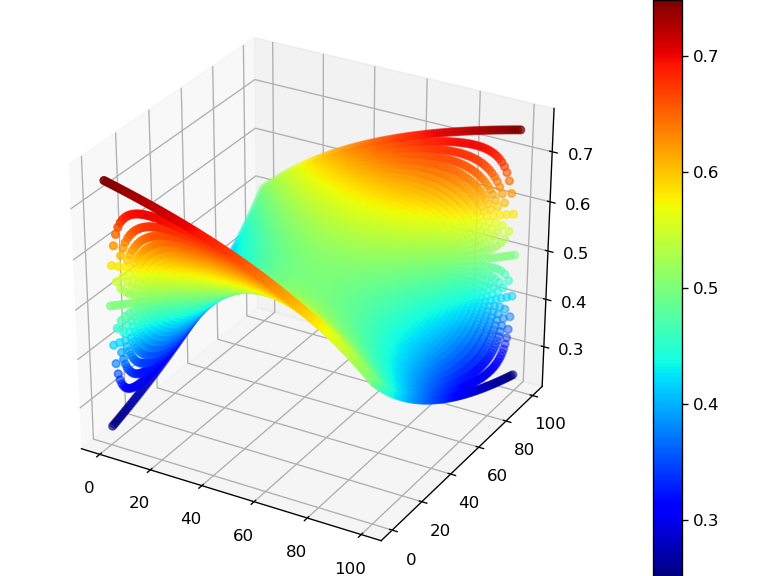

In [9]:
def scatter3d(x, y, z, cs, colorsMap='jet'):
    scalarMap = cmx.ScalarMappable(cmap=plt.get_cmap(colorsMap))
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    return plt

plot = scatter3d(Nw, Nb, P, P)
plot.show()

As we can see here the problem is indeed symmetrical and the PMF has two maxima located in the top left and the top right corners corresponding to $n_w=1,n_b=0$ and $n_w=n-1,n_b=n$ respectively.

Interestingly $$\lim_{n\to\infty}\max_{n_w,n_b}P(S)=\frac{3}{4}$$

Please see the respective answer on https://math.stackexchange.com/a/2478574/235414

### Conclusion

To maximize their chance of survival one should put a single white marble in one urn and the rest of the marbles in the other.
